##libraries

In [2]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, UpSampling2D
from tensorflow.keras.layers import Reshape, Conv2DTranspose, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split


In [3]:
list_paths = []
for folder in os.listdir('/kaggle/input/flowers-five-classes/train'):
  for file in os.listdir('/kaggle/input/flowers-five-classes/train/'+folder):
    list_paths.append('/kaggle/input/flowers-five-classes/train/'+folder+'/'+file)

print(list_paths)

['/kaggle/input/flowers-five-classes/train/dandelion/16242239484_51286673af.jpg', '/kaggle/input/flowers-five-classes/train/dandelion/5716633491_55e6f02645_n.jpg', '/kaggle/input/flowers-five-classes/train/dandelion/13651218133_b6eb8e7ed2_m.jpg', '/kaggle/input/flowers-five-classes/train/dandelion/8719032054_9a3ce4f0ff.jpg', '/kaggle/input/flowers-five-classes/train/dandelion/9472854850_fc9e1db673.jpg', '/kaggle/input/flowers-five-classes/train/dandelion/9293460423_7fbb1e3c32_n.jpg', '/kaggle/input/flowers-five-classes/train/dandelion/9939430464_5f5861ebab.jpg', '/kaggle/input/flowers-five-classes/train/dandelion/8720503800_cab5c62a34.jpg', '/kaggle/input/flowers-five-classes/train/dandelion/5674707921_1ffd141bab_n.jpg', '/kaggle/input/flowers-five-classes/train/dandelion/8689302980_9bd2f7b9fe_n.jpg', '/kaggle/input/flowers-five-classes/train/dandelion/16837594326_1056d875a4_m.jpg', '/kaggle/input/flowers-five-classes/train/dandelion/14164392167_650946a169_n.jpg', '/kaggle/input/flower

In [4]:
array_list_org = []
array_list_low = []
for i in list_paths:
  img = cv2.imread(i)
  img = cv2.resize(img, (200, 200))
  array_list_org.append(img)

  img = cv2.resize(img, (100, 100))
  img = cv2.resize(img, (200, 200))
  array_list_low.append(img)


array_list_org = np.array(array_list_org)
array_list_low = np.array(array_list_low)

In [5]:
#Normalization data
array_list_org = array_list_org.astype('float32') / 255
array_list_low = array_list_low.astype('float32') / 255


In [6]:
#spliting data
X_train, X_test, Y_train, Y_test = train_test_split(array_list_low, array_list_org, test_size=0.2, random_state=42)

In [7]:
input_shape = (200, 200, 3)
kernel_size = 3

In [8]:
#encoding
inputs = Input(shape=input_shape)
x = inputs

x = Conv2D(64, (kernel_size, kernel_size), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(128, (kernel_size, kernel_size), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(256, (kernel_size, kernel_size), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
h = MaxPooling2D((2, 2), padding='same')(x)

In [9]:
#decoding
x = Conv2DTranspose(256, (kernel_size, kernel_size), strides=(2, 2), padding='same', activation='relu')(h)
x = BatchNormalization()(x)

x = Conv2DTranspose(128, (kernel_size, kernel_size), strides=(2, 2), padding='same', activation='relu')(x)
x = BatchNormalization()(x)

x = Conv2DTranspose(64, (kernel_size, kernel_size), strides=(2, 2), padding='same', activation='relu')(x)
x = BatchNormalization()(x)

outputs = Conv2DTranspose(3, (kernel_size, kernel_size), strides=(1, 1), padding='same', activation='sigmoid')(x)

decoder = Model(inputs, outputs)


In [10]:
decoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 200, 200, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 200, 200, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 100, 100, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 100, 100, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 100, 100, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 50, 50, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 50, 50, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 50, 50, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 25, 25, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 50, 50, 256)    │       590,080 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 50, 50, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 100, 100, 128)  │       295,040 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 100, 100, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 200, 200, 64)   │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 200, 200, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 200, 200, 3)    │         1,731 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,335,043 (5.09 MB)

 Trainable params: 1,333,251 (5.09 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [11]:
decoder.compile(loss='mse', optimizer='adam')

In [12]:
decoder.fit(X_train, Y_train,
                epochs=50,
                batch_size=64,
                shuffle=True,
                validation_data=(X_test, Y_test))

Epoch 1/50


I0000 00:00:1725482530.048066     112 service.cc:145] XLA service 0x7c19a4003470 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725482530.048136     112 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1725482530.048141     112 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1725482565.247186     112 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 994ms/step - loss: 0.0492

2024-09-04 20:43:32.795811: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng4{k11=1} for conv (f32[38,3,200,200]{3,2,1,0}, u8[0]{0}) custom-call(f32[38,64,200,200]{3,2,1,0}, f32[64,3,3,3]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardInput", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0}} is taking a while...
2024-09-04 20:43:32.953040: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.157340607s
Trying algorithm eng4{k11=1} for conv (f32[38,3,200,200]{3,2,1,0}, u8[0]{0}) custom-call(f32[38,64,200,200]{3,2,1,0}, f32[64,3,3,3]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardInput", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn

35/35 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - loss: 0.0486 - val_loss: 0.0645
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 21s 586ms/step - loss: 0.0124 - val_loss: 0.0729
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 20s 580ms/step - loss: 0.0097 - val_loss: 0.0711
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 20s 565ms/step - loss: 0.0090 - val_loss: 0.0675
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 20s 565ms/step - loss: 0.0087 - val_loss: 0.0576
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 20s 572ms/step - loss: 0.0080 - val_loss: 0.0520
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 20s 575ms/step - loss: 0.0072 - val_loss: 0.0461
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 20s 572ms/step - loss: 0.0075 - val_loss: 0.0331
Epoch 9/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 20s 572ms/step - loss: 0.0070 - val_loss: 0.0317
Epoch 10/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 20s 572ms/step - loss: 0.0072 - val_loss: 0.0270
Epoch 11/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 20s 572ms/step - loss: 0.0064 - val_loss: 0.0216
Epoch 12/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 20s 570ms/step -

##result

In [13]:
#predict on test data
x_decoded = decoder.predict(X_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 14s 280ms/step


In [14]:
x_decoded = (x_decoded * 255).astype(np.uint8)

/tmp/ipykernel_36/4194888168.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(2,4,1)


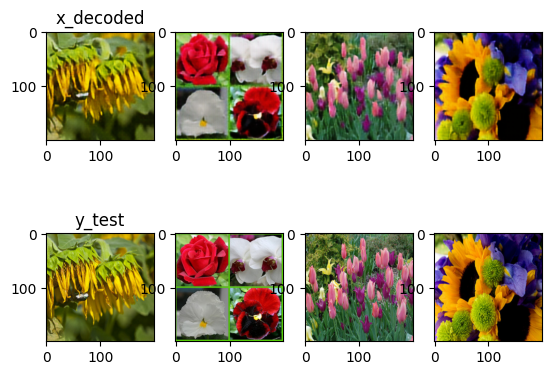

In [19]:
plt.figure()
plt.title("x_decode")
ax1 = plt.subplot(2,4,1)
ax1.title.set_text('x_decoded')
plt.imshow(cv2.cvtColor(x_decoded[0], cv2.COLOR_BGR2RGB))
plt.subplot(2,4,2)
plt.imshow(cv2.cvtColor(x_decoded[1], cv2.COLOR_BGR2RGB))
plt.subplot(2,4,3)
plt.imshow(cv2.cvtColor(x_decoded[2], cv2.COLOR_BGR2RGB))
plt.subplot(2,4,4)
plt.imshow(cv2.cvtColor(x_decoded[3], cv2.COLOR_BGR2RGB))
ax2 = plt.subplot(2,4,5)
ax2.title.set_text('y_test')
plt.imshow(cv2.cvtColor(Y_test[0], cv2.COLOR_BGR2RGB))
plt.subplot(2,4,6)
plt.imshow(cv2.cvtColor(Y_test[1], cv2.COLOR_BGR2RGB))
plt.subplot(2,4,7)
plt.imshow(cv2.cvtColor(Y_test[2], cv2.COLOR_BGR2RGB))
plt.subplot(2,4,8)
plt.imshow(cv2.cvtColor(Y_test[3], cv2.COLOR_BGR2RGB))

In [16]:
#predict on train data
x_decoded2 = decoder.predict(X_train)

69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step


In [17]:
x_decoded2 = (x_decoded2 * 255).astype(np.uint8)

/tmp/ipykernel_36/1158242060.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(2,4,1)


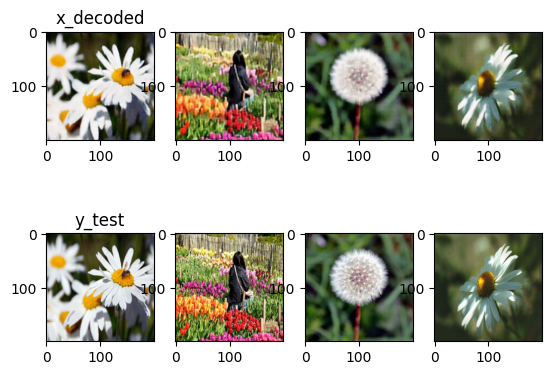

In [20]:
plt.figure()
plt.title("x_decode")
ax1 = plt.subplot(2,4,1)
ax1.title.set_text('x_decoded')
plt.imshow(cv2.cvtColor(x_decoded2[0], cv2.COLOR_BGR2RGB))
plt.subplot(2,4,2)
plt.imshow(cv2.cvtColor(x_decoded2[1], cv2.COLOR_BGR2RGB))
plt.subplot(2,4,3)
plt.imshow(cv2.cvtColor(x_decoded2[2], cv2.COLOR_BGR2RGB))
plt.subplot(2,4,4)
plt.imshow(cv2.cvtColor(x_decoded2[3], cv2.COLOR_BGR2RGB))
ax2 = plt.subplot(2,4,5)
ax2.title.set_text('y_test')
plt.imshow(cv2.cvtColor(Y_train[0], cv2.COLOR_BGR2RGB))
plt.subplot(2,4,6)
plt.imshow(cv2.cvtColor(Y_train[1], cv2.COLOR_BGR2RGB))
plt.subplot(2,4,7)
plt.imshow(cv2.cvtColor(Y_train[2], cv2.COLOR_BGR2RGB))
plt.subplot(2,4,8)
plt.imshow(cv2.cvtColor(Y_train[3], cv2.COLOR_BGR2RGB))